In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [123]:
df=pd.read_csv(r'C:\Users\admin\Downloads\data1.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [124]:
x = df.drop(['Calories'],axis=1)
y = df['Calories']

In [125]:
x

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145
2,60,103,135
3,45,109,175
4,45,117,148
...,...,...,...
164,60,105,140
165,60,110,145
166,60,115,145
167,75,120,150


In [126]:
y

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

In [127]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [128]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [129]:
df['Calories']=df['Calories'].fillna(0)
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x22ec4b45280>,
 'caps': [<matplotlib.lines.Line2D at 0x22ec4b45d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ec4b2f850>],
 'medians': [<matplotlib.lines.Line2D at 0x22ec4b4d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ec4b4d520>],
 'means': []}

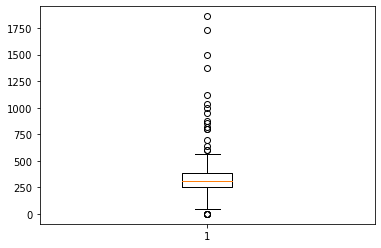

In [130]:
plt.boxplot(df['Calories'])

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 4020)

In [133]:
print(x.shape,x_train.shape,x_test.shape)

(169, 3) (118, 3) (51, 3)


In [134]:
x_train

,Duration,Pulse,Maxpulse
69,300,108,143
59,45,123,152
159,30,80,120
6,60,110,136
53,60,118,151
...,...,...,...
89,20,83,107
17,45,90,112
13,60,104,132
145,45,106,126


In [135]:
x_test

,Duration,Pulse,Maxpulse
166,60,115,145
156,60,97,131
65,180,90,130
105,30,93,128
28,60,100,132
45,60,99,119
61,160,110,137
74,45,114,146
22,60,130,101
120,30,112,137


In [136]:
y_train

69     1500.2
59      321.0
159     240.9
6       374.0
53      486.0
        ...  
89       50.3
17        0.0
13      379.3
145     270.8
11      250.7
Name: Calories, Length: 118, dtype: float64

# LinearRegression

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
lr.coef_

array([5.87320751, 0.75650009, 2.90569189])

In [140]:
lr.intercept_

-475.2050487065853

In [141]:
from math import sqrt
from  sklearn.metrics import r2_score,mean_squared_error

In [142]:
print(r2_score(y_train,lr.predict(x_train)))

0.8896121988586724


In [143]:
print(r2_score(y_test,lr.predict(x_test)))

0.7650531138822118


In [144]:
print(mean_squared_error(y_train,lr.predict(x_train)))

8945.029462816092


In [145]:
print(mean_squared_error(y_test,lr.predict(x_test)))

12333.818798893371


In [146]:
print(sqrt(r2_score(y_test,lr.predict(x_test))))

0.8746731468852875


In [147]:
print(sqrt(r2_score(y_train,lr.predict(x_train))))

0.9431925566175087


# Ridge,Lasso,Elasticnet

In [148]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
model = Ridge()

In [151]:
grid =dict()

In [152]:
grid['alpha']= np.arange (0,1,0.001)

In [153]:
search=GridSearchCV(model,grid,cv=5)

In [154]:
results= search.fit(x_train,y_train)

In [155]:
results.best_params_

{'alpha': 0.999}

In [156]:
rd = Ridge(alpha=0.999)

In [157]:
rd.fit(x_train,y_train)

Ridge(alpha=0.999)

In [158]:
print(r2_score(y_train,rd.predict(x_train)))

0.8896121988046817


In [159]:
print(r2_score(y_test,rd.predict(x_test)))

0.7650540663650628


In [160]:
model1=Lasso()

In [168]:
grid1=dict()

In [169]:
grid1['alpha']=np.arange(0,1,0.001)

In [170]:
search1=GridSearchCV(model1,grid1,cv=5)

In [179]:
results1 = search1.fit(x_train,y_train)

In [186]:
results1.best_params_

{'alpha': 0.999}

In [188]:
model2 = ElasticNet(alpha=0.999)

In [190]:
model2.fit(x_train,y_train)

ElasticNet(alpha=0.999)

In [191]:
print(r2_score(y_test,model2.predict(x_test)))

0.7651069675247879


In [192]:
print(r2_score(y_train,model2.predict(x_train)))

0.889611942569288


In [181]:
grid2=dict()

In [182]:
grid2['alpha']=np.arange(0,1,0.001)

In [183]:
search2=GridSearchCV(model2,grid2,cv=5)

In [184]:
results2 = search2.fit(x_train,y_train)

In [187]:
results2.best_params_

{'alpha': 0.999}